In [1]:
import numpy as np
import numpy.ma as ma
import argparse
import sys
sys.path.append("./utils")
import operator_calculations as op_calc
import delay_embedding as embed
import stats
import h5py
import matplotlib.pyplot as plt

In [2]:
frameRate=16.
dt=1/frameRate

ctraj_path = '../data/worm_analysis/ctrajs_1000_clusters/'
f = h5py.File(ctraj_path+'/c_traj_w.h5','r')
mD = f['MetaData']
n_clusters = np.array(mD['n_clusters'],dtype=int)[0]
delay = np.array(mD['delay'],dtype=int)[0]
ctraj_w = ma.array(f['ctraj_w'])
ctraj_w_mask = ma.array(f['ctraj_w_mask'])
f.close()
ctraj_w[ctraj_w_mask==1]=ma.masked

In [3]:
n_worms = len(ctraj_w)
C_w=[]
C_sims_w=[]
C_sims_tv_w=[]
C_sims_Markov_w=[]
for kw in range(n_worms):
    f = h5py.File('../data/worm_analysis/sims_acfs/acfs_w_{}.h5'.format(kw),'r')
    C = np.array(f['C_data'])
    C_sims = np.array(f['C_sims'])
    C_sims_tv = np.array(f['C_sims_tv'])
    lags = np.array(f['lags'])
    f.close()
    f = h5py.File('../data/worm_analysis/sims_acfs/acfs_Markov_w_{}.h5'.format(kw),'r')
    C_sims_Markov = np.array(f['C_sims'])
    lags_Markov = np.array(f['lags_sim'])
    f.close()
    C_w.append(C)
    C_sims_w.append(C_sims)
    C_sims_tv_w.append(C_sims_tv)
    C_sims_Markov_w.append(C_sims_Markov)

In [4]:
mean,cil,ciu = stats.bootstrap(C_w,n_times=100)

In [6]:
C_sims_bootstrap = np.vstack([np.array(C_sims_w)[:,np.random.randint(0,len(C_sims_w[0])),:].mean(axis=0) for k in range(1000)])
mean_sims =np.vstack(C_sims_w).mean(axis=0)
cil_sims,ciu_sims = np.percentile(C_sims_bootstrap,2.5,axis=0),np.percentile(C_sims_bootstrap,97.5,axis=0)

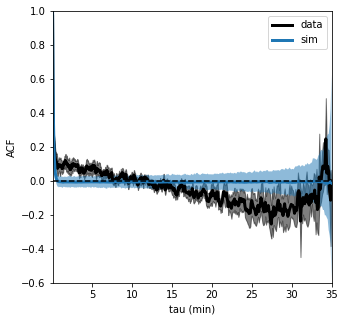

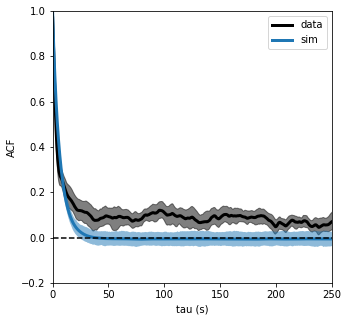

In [7]:
plt.figure(figsize=(5,5))
plt.plot(lags*dt/60,mean,c='k',label='data',lw=3)
plt.fill_between(lags*dt/60,cil,ciu,alpha=.5,color='k')
plt.plot(lags*dt/60,mean_sims,label='sim',lw=3)
plt.fill_between(lags*dt/60,cil_sims,ciu_sims,alpha=.5)
plt.axhline(0,ls='--',c='k')
plt.ylim(-.6,1)
plt.xlim(dt/60,35)
plt.xlabel('tau (min)')
plt.ylabel('ACF')
plt.legend()
# plt.savefig('acf_data_vs_sim.pdf')
plt.show()

plt.figure(figsize=(5,5))
plt.plot(lags*dt,mean,c='k',label='data',lw=3)
plt.fill_between(lags*dt,cil,ciu,alpha=.5,color='k')
plt.plot(lags*dt,mean_sims,label='sim',lw=3)
plt.fill_between(lags*dt,cil_sims,ciu_sims,alpha=.5)
plt.axhline(0,ls='--',c='k')
plt.ylim(-.2,1)
plt.xlim(0,250)
plt.xlabel('tau (s)')
plt.ylabel('ACF')
plt.legend()
# plt.savefig('acf_data_vs_sim_zoomin.pdf')
plt.show()

In [8]:
C_sims_tv_bootstrap = np.vstack([np.array(C_sims_tv_w)[:,np.random.randint(0,len(C_sims_tv_w[0])),:].mean(axis=0) for k in range(1000)])
mean_sims_tv =np.vstack(C_sims_tv_w).mean(axis=0)
cil_sims_tv,ciu_sims_tv = np.percentile(C_sims_tv_bootstrap,2.5,axis=0),np.percentile(C_sims_tv_bootstrap,97.5,axis=0)

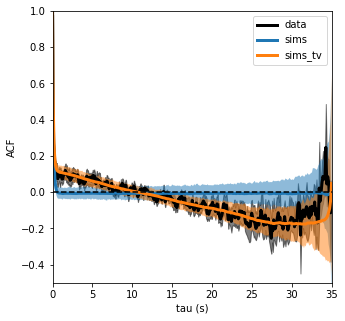

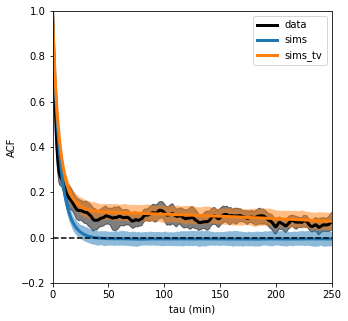

In [9]:
plt.figure(figsize=(5,5))

plt.plot(lags*dt/60,mean,c='k',label='data',lw=3)
plt.fill_between(lags*dt/60,cil,ciu,alpha=.5,color='k')
plt.plot(lags*dt/60,mean_sims,label='sims',lw=3)
plt.fill_between(lags*dt/60,cil_sims,ciu_sims,alpha=.5)
plt.plot(lags*dt/60,mean_sims_tv,label='sims_tv',lw=3)
plt.fill_between(lags*dt/60,cil_sims_tv,ciu_sims_tv,alpha=.5)
plt.axhline(0,ls='--',c='k')
plt.legend()
plt.ylim(-.5,1)
plt.xlim(0,35)
plt.xlabel('tau (s)')
plt.ylabel('ACF')
# plt.xscale('log')
# plt.savefig('acf_data_vs_tv.pdf')
plt.show()


plt.figure(figsize=(5,5))

plt.plot(lags*dt,mean,c='k',label='data',lw=3)
plt.fill_between(lags*dt,cil,ciu,alpha=.5,color='k')
plt.plot(lags*dt,mean_sims,label='sims',lw=3)
plt.fill_between(lags*dt,cil_sims,ciu_sims,alpha=.5)
plt.plot(lags*dt,mean_sims_tv,label='sims_tv',lw=3)
plt.fill_between(lags*dt,cil_sims_tv,ciu_sims_tv,alpha=.5)
plt.axhline(0,ls='--',c='k')
plt.legend()
plt.ylim(-.2,1)
plt.xlim(0,250)
plt.xlabel('tau (min)')
plt.ylabel('ACF')
# plt.xscale('log')
# plt.savefig('acf_data_vs_tv_zoomin.pdf')
plt.show()




In [10]:
C_sims_Markov_bootstrap = np.vstack([np.array(C_sims_Markov_w)[:,np.random.randint(0,len(C_sims_Markov_w[0])),:].mean(axis=0) for k in range(1000)])
mean_sims_Markov =np.vstack(C_sims_Markov_w).mean(axis=0)
cil_sims_Markov,ciu_sims_Markov = np.percentile(C_sims_Markov_bootstrap,2.5,axis=0),np.percentile(C_sims_Markov_bootstrap,97.5,axis=0)

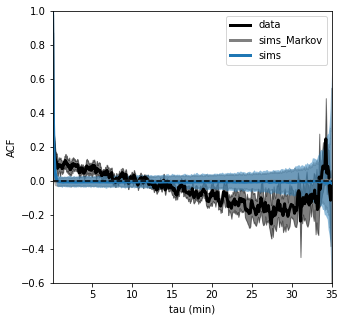

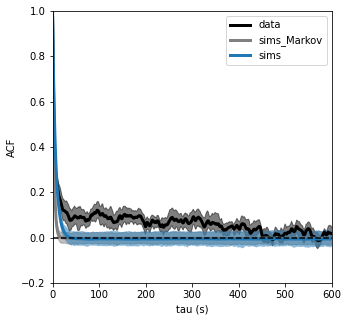

In [12]:
plt.figure(figsize=(5,5))
plt.plot(lags*dt/60,mean,c='0',label='data',lw=3)
plt.fill_between(lags*dt/60,cil,ciu,alpha=.5,color='0')
plt.plot(lags_Markov*dt*delay/60,mean_sims_Markov,label='sims_Markov',c='.5',lw=3)
plt.fill_between(lags_Markov*dt*delay/60,cil_sims_Markov,ciu_sims_Markov,alpha=.5,color='.5')
plt.plot(lags*dt/60,mean_sims,label='sims',lw=3)
plt.fill_between(lags*dt/60,cil_sims,ciu_sims,alpha=.5)
plt.axhline(0,ls='--',c='k')
plt.legend()
plt.ylim(-.6,1)
plt.xlim(dt/60,35)
plt.xlabel('tau (min)')
plt.ylabel('ACF')
plt.savefig('acf_data_vs_sim_Markov.pdf')
# plt.xscale('log')
plt.show()

plt.figure(figsize=(5,5))
plt.plot(lags*dt,mean,c='0',label='data',lw=3)
plt.fill_between(lags*dt,cil,ciu,alpha=.5,color='0')
plt.plot(lags_Markov*dt*delay,mean_sims_Markov,label='sims_Markov',c='.5',lw=3)
plt.fill_between(lags_Markov*dt*delay,cil_sims_Markov,ciu_sims_Markov,alpha=.5,color='.5')
plt.plot(lags*dt,mean_sims,label='sims',lw=3)
plt.fill_between(lags*dt,cil_sims,ciu_sims,alpha=.5)
plt.axhline(0,ls='--',c='k')
plt.legend()
plt.ylim(-.2,1)
plt.xlim(0,600)
plt.xlabel('tau (s)')
plt.ylabel('ACF')
plt.savefig('acf_data_vs_sim_Markov_zoomin.pdf')
# plt.xscale('log')
plt.show()